In [70]:
import json

stats_deepscale_r = json.load(open("deepscale_r_checkpoint.json"))
stats_big_math = json.load(open("big-math-rl-verified-checkpoint.json"))

In [71]:

from datasets import load_dataset

deepscale_dataset = load_dataset('agentica-org/DeepScaleR-Preview-Dataset', 'default')


In [72]:
valid_ids_deepscale = []
for k, v in stats_deepscale_r['stats'].items():
    if len(v) > 1:
        valid_ids_deepscale.append(int(k))

In [73]:
# DatasetDict

from datasets import DatasetDict

In [74]:
filtered_dataset_deepscale = deepscale_dataset["train"].select([idx for idx in valid_ids_deepscale if idx < len(deepscale_dataset["train"])])

# 如果你想要重新包装成 DatasetDict
filtered_dataset_dict_deepscale = DatasetDict({"train": filtered_dataset_deepscale})

print(filtered_dataset_dict_deepscale)

DatasetDict({
    train: Dataset({
        features: ['problem', 'answer', 'solution'],
        num_rows: 34787
    })
})


In [66]:

# save the new dataset
filtered_dataset_dict_deepscale.save_to_disk('deepscale_partial_mar21_filtered_basic.json')

# upload to huggingface
filtered_dataset_dict_deepscale.push_to_hub('deepscale_partial_mar21_filtered_basic')

Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/SDSB/deepscale_partial_mar21_filtered_basic/commit/6f2445297833fe9699f05486af15d1b7fa7faadc', commit_message='Upload dataset', commit_description='', oid='6f2445297833fe9699f05486af15d1b7fa7faadc', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/SDSB/deepscale_partial_mar21_filtered_basic', endpoint='https://huggingface.co', repo_type='dataset', repo_id='SDSB/deepscale_partial_mar21_filtered_basic'), pr_revision=None, pr_num=None)

In [68]:
big_math_dataset = load_dataset('SynthLabsAI/Big-Math-RL-Verified', 'default')

valid_ids_big_math = []
for k, v in stats_big_math['stats'].items():
    if len(v) > 1:
        valid_ids_big_math.append(int(k))

# only retain the dataset with valid ids
filtered_dataset_big_math = big_math_dataset["train"].select([idx for idx in valid_ids_big_math if idx < len(big_math_dataset["train"])])

# 如果你想要重新包装成 DatasetDict
filtered_dataset_dict_big_math = DatasetDict({"train": filtered_dataset_big_math})

print(filtered_dataset_dict_big_math)


DatasetDict({
    train: Dataset({
        features: ['problem', 'answer', 'source', 'domain', 'llama8b_solve_rate'],
        num_rows: 52860
    })
})


In [69]:
# save the new dataset
filtered_dataset_dict_big_math.save_to_disk('big_math_partial_mar21_filtered_basic.json')

# upload to huggingface
filtered_dataset_dict_big_math.push_to_hub('big_math_partial_mar21_filtered_basic')


Uploading the dataset shards: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


HfHubHTTPError: 504 Server Error: Gateway Time-out for url: https://huggingface.co/api/datasets/SDSB/big_math_partial_mar21_filtered_basic/tree/main?recursive=True&expand=False

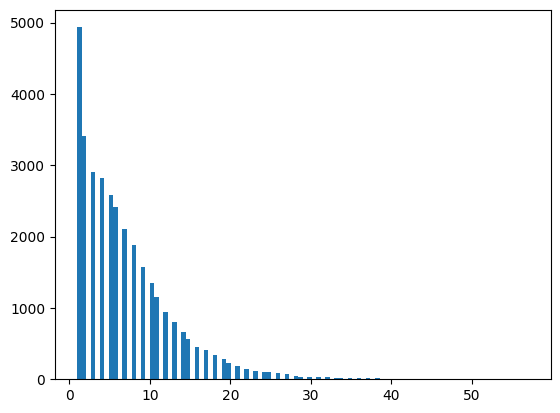

In [9]:
import matplotlib.pyplot as plt

plt.hist(cnt, bins=100)
plt.show()
